In [1]:
import pandas as pd
print(pd.__version__)  # Should show the installed version (e.g., 2.1.0)

2.2.3


In [2]:


# Load data
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Intellihack_TetraNeurons_02\\customer_behavior_analytcis.csv")

# Display the first 5 rows
print(df.head())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  


In [3]:
print("Initial data shape:", df.shape)

Initial data shape: (999, 6)


In [4]:
print(df.info())  # Check for missing values and confirm df is loaded


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None


Show Missing Values


Missing Values Summary:
total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


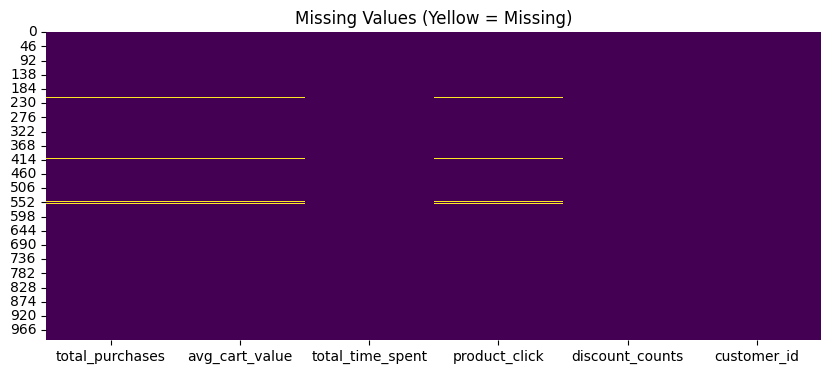

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values
print("\n\033[1mMissing Values Summary:\033[0m")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values (Yellow = Missing)")
plt.show()

Show Missing Values

 Handle Missing Values

In [ ]:
# Drop rows with missing values
df_clean = df.dropna()

print("\n\033[1mAfter Dropping Missing Values:\033[0m")
print(f"Rows removed: {len(df) - len(df_clean)}")
print("New shape:", df_clean.shape)

# Verify no missing values remain
print("\n\033[1mMissing Values After Cleaning:\033[0m")
print(df_clean.isnull().sum())


After Dropping Missing Values:
Rows removed: 20
New shape: (979, 6)

Missing Values After Cleaning:
total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


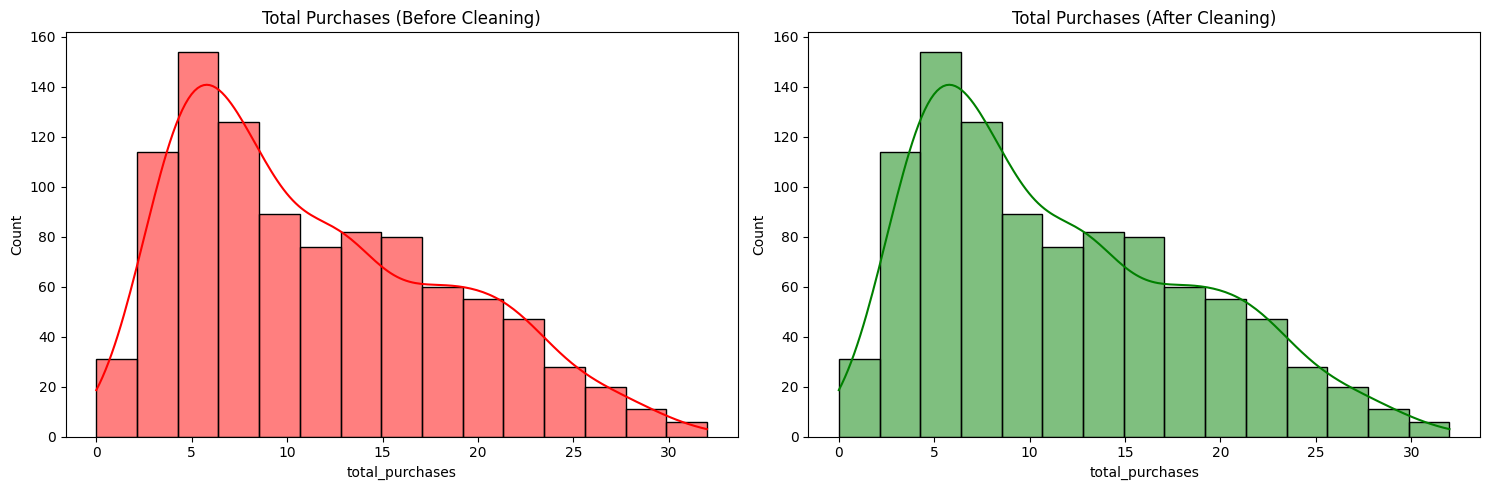

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before cleaning
sns.histplot(df['total_purchases'], kde=True, ax=axes[0], color='red')
axes[0].set_title('Total Purchases (Before Cleaning)')

# After cleaning
sns.histplot(df_clean['total_purchases'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Total Purchases (After Cleaning)')

plt.tight_layout()
plt.show()

In [12]:

print(df.head())
print(df.describe())
print(df.isnull().sum())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   


In [14]:


print(df_clean.isnull().sum())

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


Distributions: Use histograms/kernel density plots for each feature.

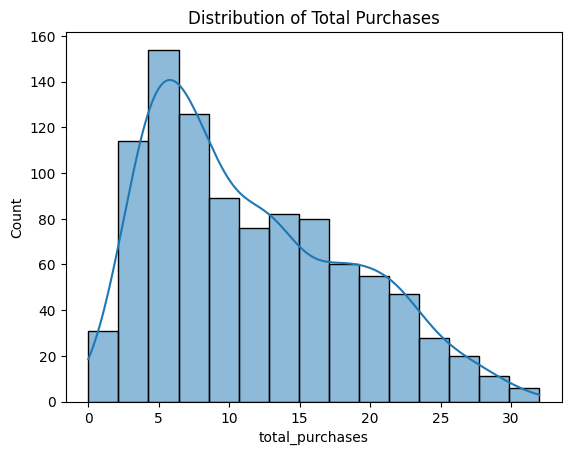

In [ ]:
df = df_clean()
sns.histplot(df['total_purchases'], kde=True)
plt.title('Distribution of Total Purchases')
plt.show()

customer_id is still being treated as numeric

In [24]:
print(df.dtypes)


total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
dtype: object


Convert customer_id to String

In [25]:
df['customer_id'] = df['customer_id'].astype(str)


Correlation Matrix: Check relationships between features

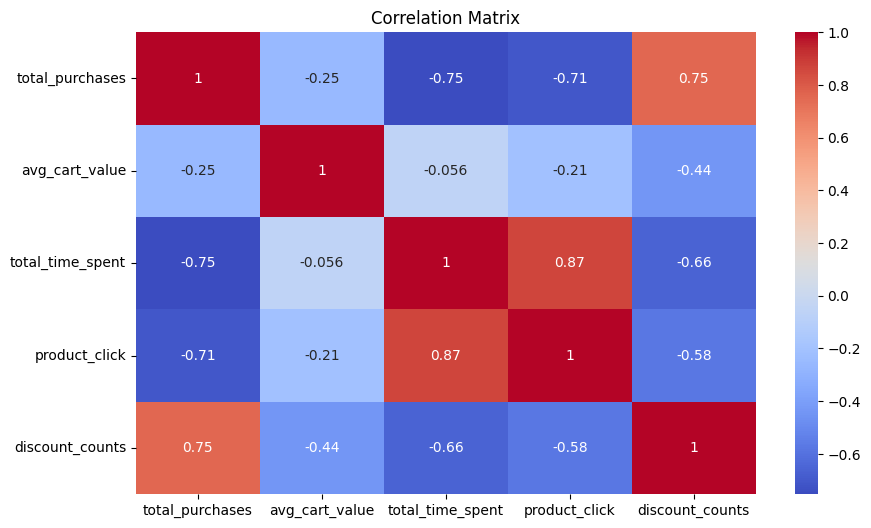

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop customer_id and ensure only numeric columns remain
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
df_preprocessed = df_clean

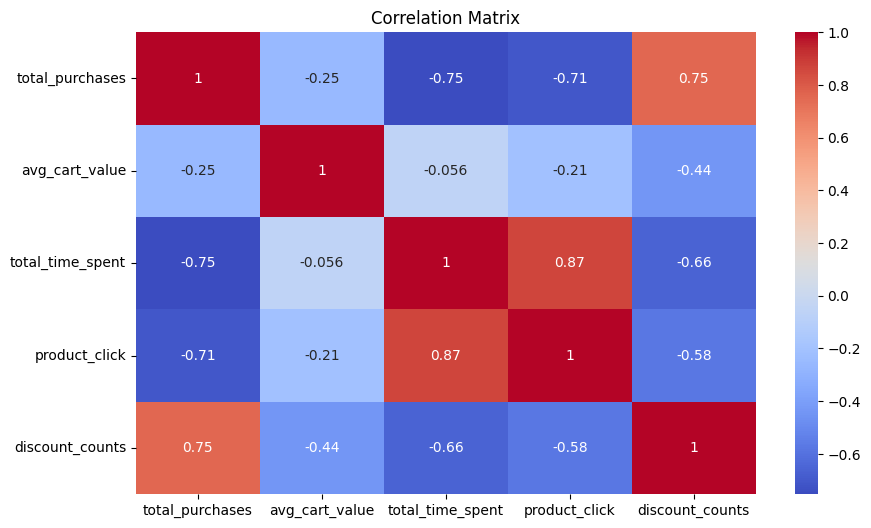

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop customer_id and ensure only numeric columns remain
numeric_df = df_preprocessed.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Pair Plots: Identify clusters visually.

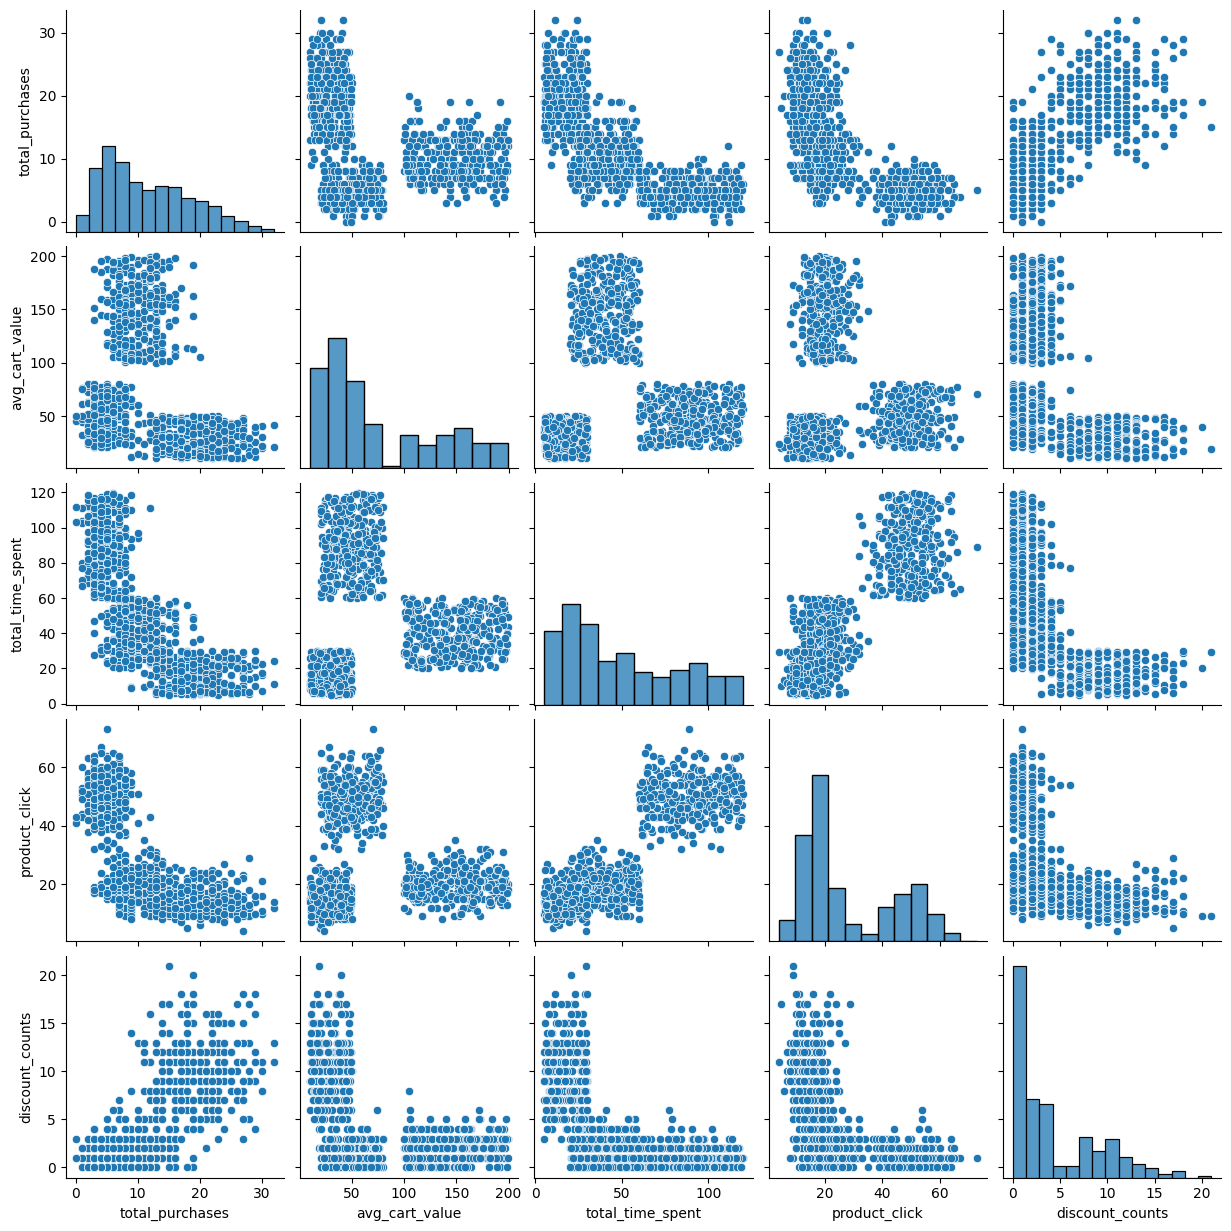

In [35]:
sns.pairplot(numeric_df[['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']])

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        979.000000     979.000000   
mean         11.570991       75.457978         49.376966      28.237998   
std           7.016327       55.067835         32.785737      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.330000      16.000000   
50%          10.000000       49.380000         40.310000      21.000000   
75%          17.000000      121.255000         77.270000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       979.000000  
mean          4.309499  
std           4.514147  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


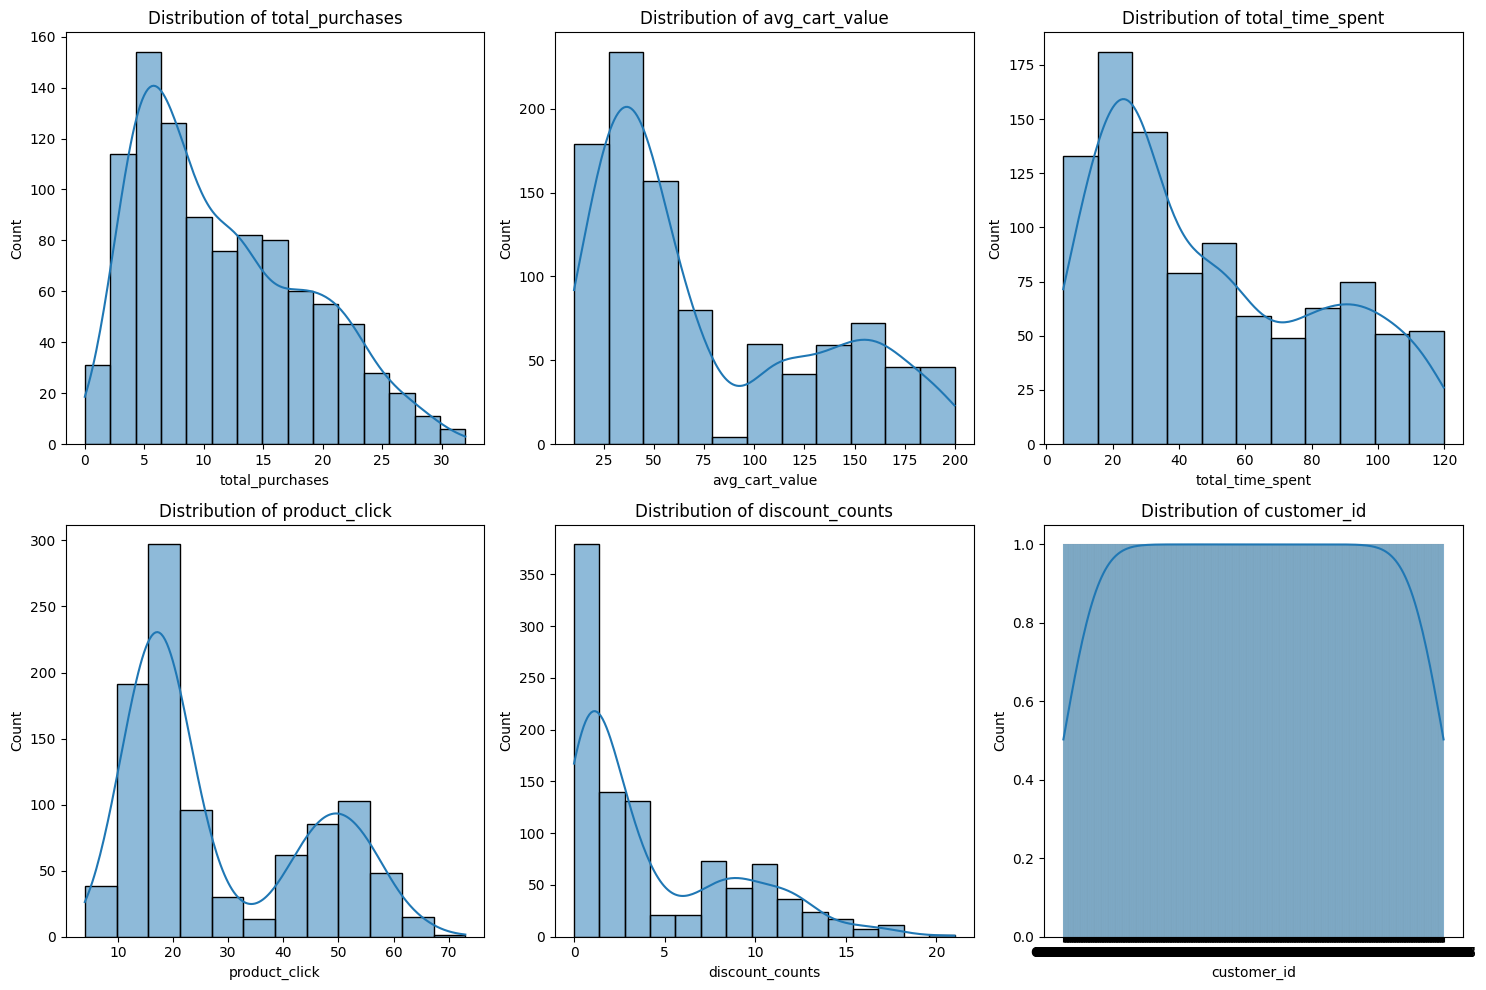

ValueError: could not convert string to float: 'CM00000'

<Figure size 1000x800 with 0 Axes>

In [39]:
# Summary statistics
print(df_preprocessed.describe())

# Check distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_preprocessed.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_preprocessed[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_preprocessed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()